In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from statsmodels.formula.api import ols
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')
import googleapiclient.discovery
import os
import json
from dotenv import load_dotenv
load_dotenv()
import string

In [2]:
# Import nltk and the required resources.
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giannixue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/giannixue/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
# Load the dataset
reviews = pd.read_csv('turtle_reviews.csv')

In [4]:
# Sense-checking the DataFrame
print(reviews.head())
print(reviews.tail())
print(reviews.dtypes)
print(reviews.info())
print(reviews.describe())

# Drop redundant columns
reviews = reviews[['review', 'summary']]

# Check for missing values
print(reviews.isnull().sum())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

In [5]:
df1 = reviews.copy()
df1['combined'] = df1['review'] + ' ' + df1['summary']
print(df1)

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  \
0     The fact that 50% of this space is wasted on a...   
1     Another worthless Dungeon Master's screen from...   
2                       pretty, but also pretty useless   
3                                            Five Stars

In [6]:
import nltk
nltk.download('punkt')
# Create a new DataFrame df2 with the tokenized data
df2 = df1.copy()  # Create a copy of the original DataFrame

# Tokenize the "combined" column using word_tokenize
df2['tokens'] = df2['combined'].apply(lambda text: nltk.word_tokenize(text))

# Display df2 with the tokens
print(df2[['combined', 'tokens']])

[nltk_data] Downloading package punkt to /Users/giannixue/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                               combined  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                               fun game! Four Stars   
1999  This game is fun. A lot like scrabble without ...   

                                                 tokens  
0     [When, it, comes, to, a, DM, 's, screen, ,, th...  
1     [An, Open, Letter, to, GaleForce9, *, :, Your,...  
2     [Nice, art, ,, nice, printing, ., Why, two, pa...  
3     [Amazing, buy, !, Bought, it, as, a, gift, for...  
4

In [7]:
# Get a list of all english words so we can exclude anything that doesn't appear on the list.
all_english_words = set(words.words())

# View results.
all_english_words

{'Hydatina',
 'pager',
 'damped',
 'notaryship',
 'telangiectasis',
 'flightily',
 'frostbow',
 'Polabish',
 'twifold',
 'prionodesmaceous',
 'stockbroker',
 'electivity',
 'kora',
 'landways',
 'rattlebrain',
 'thinghood',
 'calorie',
 'lof',
 'stalactitious',
 'tinwork',
 'antipragmatist',
 'primrosetide',
 'Chuchona',
 'herschelite',
 'otography',
 'anicular',
 'nuclei',
 'hypertoxicity',
 'Turkize',
 'impeditive',
 'whimper',
 'slacken',
 'Zeelander',
 'mannoheptose',
 'geodiatropism',
 'anisopterous',
 'dichromatic',
 'habitant',
 'unattentive',
 'emulousness',
 'upsiloid',
 'xenophoran',
 'convexity',
 'subtercelestial',
 'stylomaxillary',
 'Campanian',
 'pleacher',
 'Cyclotosaurus',
 'herdswoman',
 'peroba',
 'excrement',
 'roller',
 'cowal',
 'hyalinocrystalline',
 'brayer',
 'interpolitical',
 'punjum',
 'exilarch',
 'applaudingly',
 'copulable',
 'discursive',
 'pseudomonastic',
 'histographical',
 'inaudible',
 'jumbuck',
 'legendic',
 'stonefish',
 'prefixally',
 'liverishn

In [8]:
# Some pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words, but is not a stopword.

df3 = [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words] for x in df2['tokens']]

In [9]:
df3

[['comes',
  'screen',
  'space',
  'screen',
  'absolute',
  'premium',
  'fact',
  'space',
  'wasted',
  'art',
  'terribly',
  'informative',
  'art',
  'well',
  'completely',
  'useless',
  'reason',
  'gave',
  'technically',
  'speaking',
  'least',
  'still',
  'stand',
  'block',
  'dice',
  'ball',
  'completely',
  'fact',
  'space',
  'wasted',
  'art',
  'terribly',
  'informative',
  'art'],
 ['open',
  'letter',
  'unpainted',
  'bad',
  'spell',
  'great',
  'board',
  'however',
  'terrible',
  'still',
  'waiting',
  'single',
  'screen',
  'polluted',
  'pointless',
  'useful',
  'tables',
  'single',
  'use',
  'screen',
  'useful',
  'running',
  'storm',
  'king',
  'thunder',
  'adventure',
  'even',
  'despite',
  'fact',
  'geared',
  'adventure',
  'path',
  'usefulness',
  'negligible',
  'best',
  'massive',
  'swath',
  'inner',
  'panel',
  'wasted',
  'bloated',
  'overland',
  'map',
  'could',
  'easily',
  'reduced',
  'single',
  'panel',
  'size',
 

In [10]:
!pip install wordcloud matplotlib

In [11]:
# Combine all tokens in df2['tokens'] and df3 into a single string
all_tokens_df2 = ' '.join(df2['tokens'].sum())
all_tokens_df3 = ' '.join([' '.join(tokens) for tokens in df3])  # Flatten the list of lists

# Create WordClouds for both df2['tokens'] and df3
wordcloud_df2 = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_df2)
wordcloud_df3 = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_df3)

# Plot the WordClouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_df2, interpolation='bilinear')
plt.title('Word Cloud - df2["tokens"]')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_df3, interpolation='bilinear')
plt.title('Word Cloud - df3')
plt.axis('off')

plt.show()

NameError: name 'WordCloud' is not defined

In [ ]:
from nltk import FreqDist
# Combine all tokenized words from the "review_tokens" column into a single list
flat_list_df3 = [word for sublist in df3 for word in sublist]

# Create a frequency distribution
freq_dist = FreqDist(flat_list_df3)

# Display the most common words and their frequencies
print(freq_dist.most_common(30))

# Plot the frequency distribution
freq_dist.plot(20, cumulative=False)

In [12]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/giannixue/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

In [14]:
# Run through a dictionary comprehension to take every cleaned comment
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df3}

In [15]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity = pd.DataFrame(df_polarity).T

# View the DataFrame.
polarity

,neg,neu,pos,compound
comes screen space screen absolute premium fact space wasted art terribly informative art well completely useless reason gave technically speaking least still stand block dice ball completely fact space wasted art terribly informative art,0.402,0.554,0.043,-0.9552
open letter unpainted bad spell great board however terrible still waiting single screen polluted pointless useful tables single use screen useful running storm king thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted bloated overland map could easily reduced single panel size table short stop making crap another worthless dungeon master screen,0.233,0.501,0.265,0.4215
nice art nice printing two filled general forgotten map beyond one blue ocean waste understand ca make useful rather solely specific adventure supposed able transpose adventure outside forgotten even list new would least useful map even would stuff related running game stuff related thing curse make useful raven loft undead horror general instead huge amount screen space solely castle useful small fraction time even curse adventure let alone various really kill extended use thinking potential use adventure question well use sense rage screen far useful broad dark covering lot various may suffer map one panel storm one decent tables really mark maybe ask would use pretty also pretty useless,0.217,0.528,0.255,0.4417
amazing buy bought gift new perfect five,0.000,0.278,0.722,0.8860
review previous completely unnecessary nearly useless skip definition waste money money trap,0.476,0.524,0.000,-0.8000
...,...,...,...,...
perfect word game mixed perhaps giving little help yr old love perfect word game mixed,0.000,0.379,0.621,0.9469
great game think would like first received turned lot fun play regularly order extra set always travel stuff super fun,0.000,0.418,0.582,0.9612
great game mind nimble great game,0.000,0.328,0.672,0.8481
fun game four,0.000,0.377,0.623,0.5106


In [16]:
# With the non-aplhanumeric words (the emojis, handles, hashtags and stopwords) removed 
# some of the most positive words are single words

# Get the top 15 most positive cleaned 
polarity.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
thanks,0.0,0.000,1.000,0.4404
great great,0.0,0.000,1.000,0.8481
cute cute,0.0,0.000,1.000,0.7184
great thank great,0.0,0.000,1.000,0.8934
great,0.0,0.000,1.000,0.6249
great cute,0.0,0.000,1.000,0.7964
gift gift,0.0,0.000,1.000,0.7003
super cute love,0.0,0.000,1.000,0.9022
love love,0.0,0.000,1.000,0.8555
inspiring creativity fun,0.0,0.000,1.000,0.8271


In [17]:
# Get the top 15 most negative words related to ChatGPT.
polarity.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
difficult three,0.714,0.286,0.000,-0.3612
cardboard ghost original hard believe shame disgusting cardboard ghost original hard believe shame disgusting,0.703,0.138,0.159,-0.9300
sorry find product boring frank juvenile disappointing,0.630,0.370,0.000,-0.7003
never get old great toy great delivery great toy,0.622,0.378,0.000,-0.8715
split unusable disappointed,0.608,0.392,0.000,-0.4767
found difficult three,0.556,0.444,0.000,-0.3612
anger way discuss anger repetitive start get half round repetitive start get half round,0.533,0.467,0.000,-0.8860
play find board game dumb boring stick real thing find board game dumb boring,0.496,0.398,0.106,-0.8316
really considered book really small disappointed really small disappointed,0.491,0.509,0.000,-0.7755
review previous completely unnecessary nearly useless skip definition waste money money trap,0.476,0.524,0.000,-0.8000


In [18]:
# The describe function on the compound will show the distribution and moments. 

polarity['compound'].describe()

count    1917.000000
mean        0.697427
std         0.364072
min        -0.955200
25%         0.624900
50%         0.844200
75%         0.937100
max         0.998800
Name: compound, dtype: float64

<Axes: >

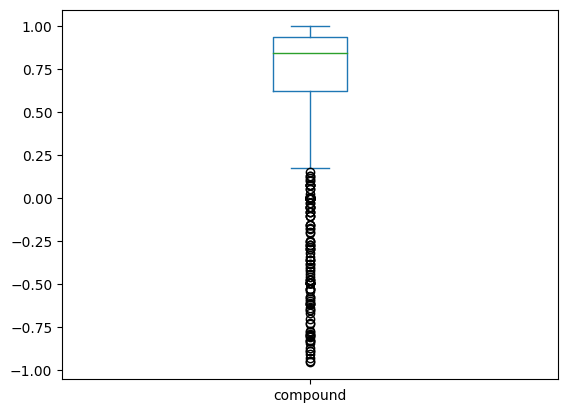

In [19]:
# Sometimes the best way to see is to plot. 
# In the data sampled here many of the values are 0
# There are less negative values than positive but the negative values are highly negative.

%matplotlib inline
import matplotlib.pyplot as plt

# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

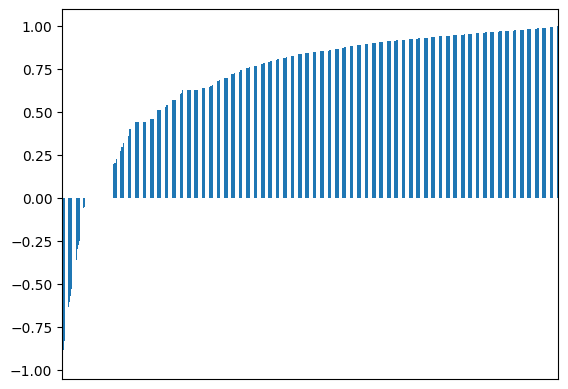

In [20]:
# Example of a barplot.
_plot = polarity.reset_index()['compound'].sort_values()
ax1 = plt.axes()
_plot.plot(kind='bar')

x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()
plt.close()

array([[<Axes: title={'center': 'compound'}>]], dtype=object)

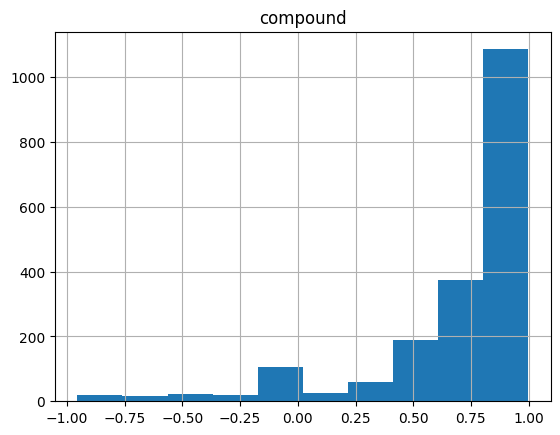

In [21]:
# You can also create a histogram:
polarity['compound'].sort_values().reset_index().hist()